In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RXGate ,RYGate,RZGate
from math import pi


import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer,Aer,assemble

# import basic plot tools
from qiskit.tools.visualization import circuit_drawer, plot_histogram


from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate



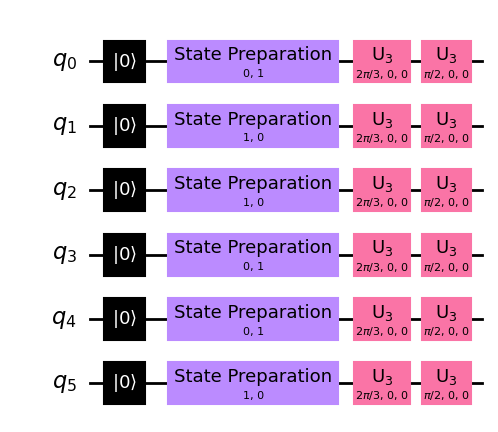

In [2]:
matrix1_alice = np.matrix([[np.cos(np.pi / 3),-(np.sin(np.pi / 3))],
         [np.sin(np.pi / 3),np.cos(np.pi / 3)]
         ])

matrix1_dag_alice = np.matrix([[np.cos(np.pi / 3),(np.sin(np.pi / 3))],
         [-(np.sin(np.pi / 3)),np.cos(np.pi / 3)]
         ]) 

matrix2_bob = np.matrix([[np.cos(np.pi / 4),-(np.sin(np.pi / 4))],
         [np.sin(np.pi / 4),np.cos(np.pi / 4)]
         ])

matrix2_dag_bob = np.matrix([[np.cos(np.pi / 4),(np.sin(np.pi / 4))],
         [-(np.sin(np.pi / 4)),np.cos(np.pi / 4)]
         ]) 

matrix_evesdropper = np.matrix([[np.cos(np.pi / 5),-(np.sin(np.pi / 5))],
         [np.sin(np.pi / 5),np.cos(np.pi / 5)]
         ])

#gate = Gate('fuk',1,matrix2)
gate1_alice = UnitaryGate(matrix1_alice) 
gate2_alice_dag = UnitaryGate(matrix1_dag_alice)

gate1_bob = UnitaryGate(matrix2_bob) 
gate2_bob_dag = UnitaryGate(matrix2_dag_bob)

gate_evesdropper = UnitaryGate(matrix_evesdropper) 
# circuit1 = QuantumCircuit(2)
qubit_2circuit=QuantumCircuit(6)



qubit_2circuit.initialize([0,1],0)
qubit_2circuit.initialize([1,0],1)
qubit_2circuit.initialize([1,0],2)
qubit_2circuit.initialize([0,1],3)
qubit_2circuit.initialize([0,1],4)
qubit_2circuit.initialize([1,0],5)




qubit_2circuit.append(gate1_alice, [0])
qubit_2circuit.append(gate1_bob, [0])

qubit_2circuit.append(gate1_alice, [1])
qubit_2circuit.append(gate1_bob, [1])

qubit_2circuit.append(gate1_alice, [2])
qubit_2circuit.append(gate1_bob, [2])

qubit_2circuit.append(gate1_alice, [3])
qubit_2circuit.append(gate1_bob, [3])

qubit_2circuit.append(gate1_alice, [4])
qubit_2circuit.append(gate1_bob, [4])

qubit_2circuit.append(gate1_alice, [5])
qubit_2circuit.append(gate1_bob, [5])


qubit_2circuit.decompose().draw(output='mpl')


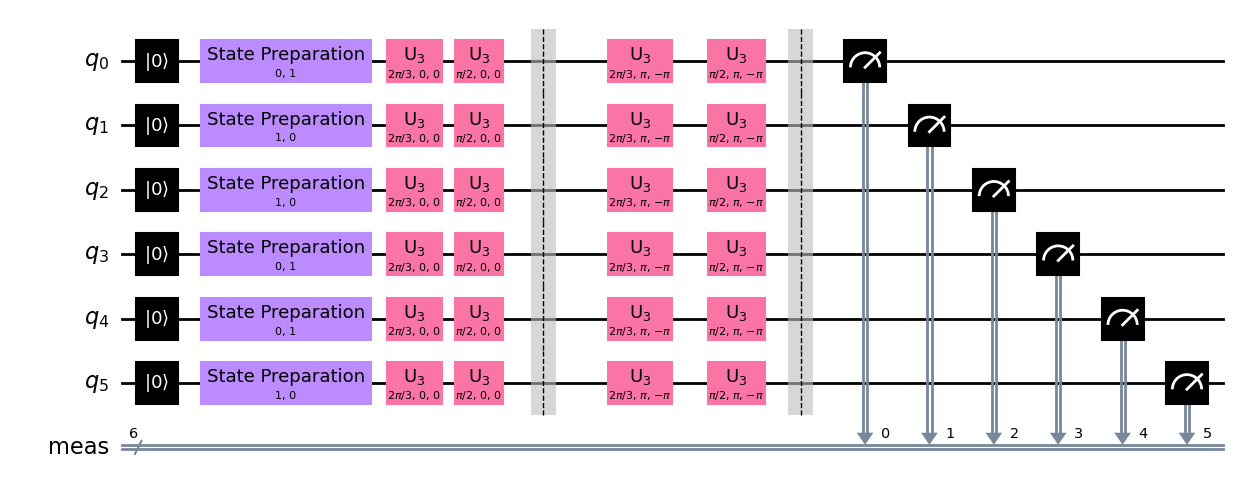

In [3]:
qubit_2circuit.barrier()

qubit_2circuit.append(gate2_alice_dag, [0])
qubit_2circuit.append(gate2_bob_dag, [0])

qubit_2circuit.append(gate2_alice_dag, [1])
qubit_2circuit.append(gate2_bob_dag, [1])

qubit_2circuit.append(gate2_alice_dag, [2])
qubit_2circuit.append(gate2_bob_dag, [2])

qubit_2circuit.append(gate2_alice_dag, [3])
qubit_2circuit.append(gate2_bob_dag, [3])

qubit_2circuit.append(gate2_alice_dag, [4])
qubit_2circuit.append(gate2_bob_dag, [4])

qubit_2circuit.append(gate2_alice_dag, [5])
qubit_2circuit.append(gate2_bob_dag, [5])


qubit_2circuit.measure_all()


display(qubit_2circuit.decompose().draw(output='mpl'))

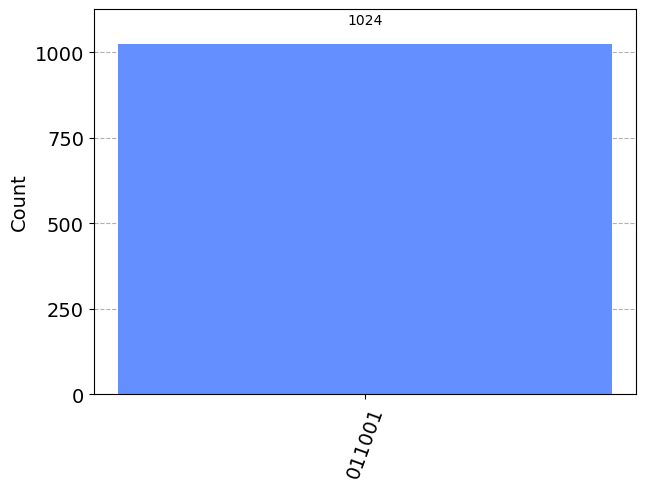

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qubit_2circuit)
resultQ= job.result()  
display(plot_histogram(job.result().get_counts()))
kk=job.result().get_counts()

ENTANGLED based  QUANTUM_KEY_PROTOCOL

In [3]:
qubit_3circuit=QuantumCircuit(2,2)

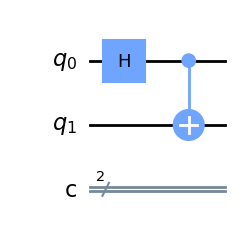

In [4]:
qubit_3circuit.h(0)
qubit_3circuit.cx(0,1)
qubit_3circuit.draw(output='mpl')

In [3]:
experment=QuantumCircuit(2,3)

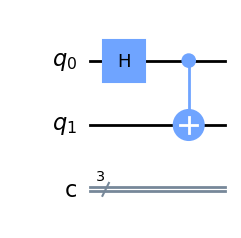

In [4]:
experment.h(0)
experment.cx(0,1)
experment.draw(output='mpl')

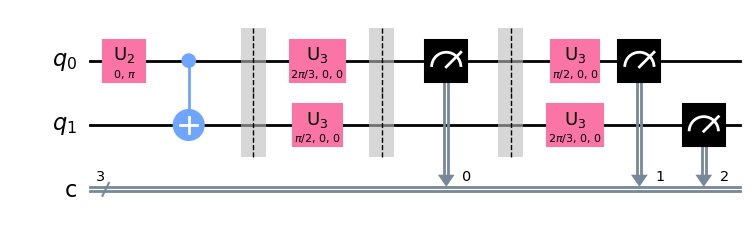

In [5]:
#########################################
experment.barrier()
experment.append(gate1_alice, [0])
experment.append(gate1_bob, [1])
experment.barrier()
experment.measure(0,0)
experment.barrier()
experment.append(gate1_bob, [0])
#########################################
experment.append(gate1_alice, [1])


experment.measure(0,1)
experment.measure(1,2)
experment.decompose().draw(output='mpl')

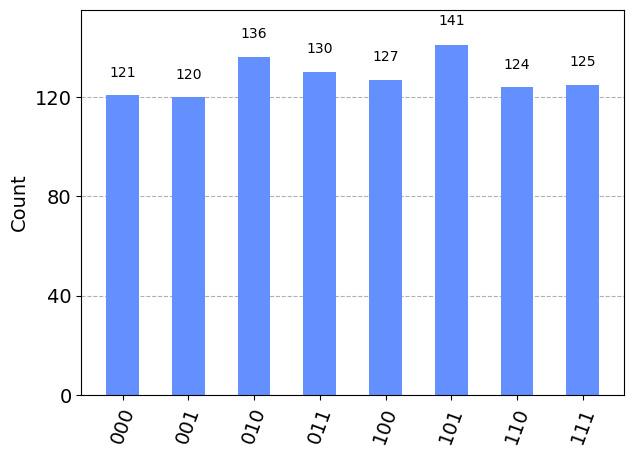

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(experment)
resultQ= job.result()  
display(plot_histogram(job.result().get_counts()))
kk=job.result().get_counts()

In [7]:
#########################################
qubit_3circuit.append(gate1_alice, [0])

qubit_3circuit.append(gate1_bob, [0])
#########################################

qubit_3circuit.append(gate1_bob, [1])
qubit_3circuit.append(gate1_alice, [1])


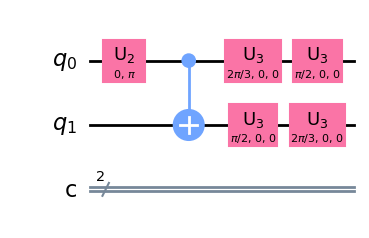

In [8]:
qubit_3circuit.decompose().draw(output='mpl')

In [9]:
qubit_3circuit.measure(0,0)
qubit_3circuit.measure(1,1)

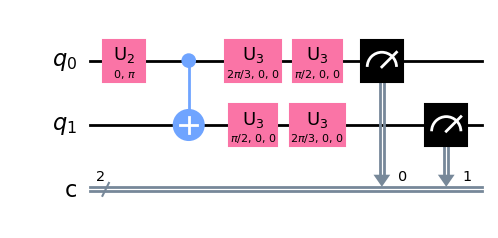

In [10]:
qubit_3circuit.decompose().draw(output='mpl')

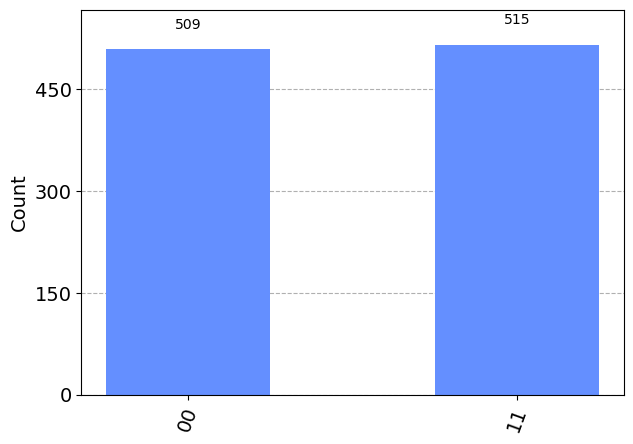

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qubit_3circuit)
resultQ= job.result()  
display(plot_histogram(job.result().get_counts()))
kk=job.result().get_counts()

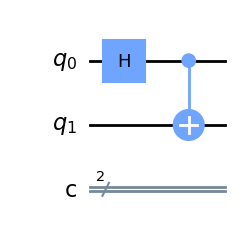

In [12]:
qubit_4circuit=QuantumCircuit(2,2)

qubit_4circuit.h(0)
qubit_4circuit.cx(0,1)
qubit_4circuit.draw(output='mpl')

In [13]:
#########################################
qubit_4circuit.barrier()
qubit_4circuit.append(gate1_alice, [0])
qubit_4circuit.append(gate1_bob, [1])
qubit_4circuit.barrier()
qubit_4circuit.append(gate_evesdropper, [0])
# qubit_4circuit.append(gate_evesdropper, [1])
qubit_4circuit.barrier()
qubit_4circuit.append(gate1_bob, [0])
qubit_4circuit.append(gate1_alice, [1])
#########################################
# qubit_4circuit.append(gate_evesdropper, [0])
# qubit_4circuit.append(gate_evesdropper, [0])
#########################################



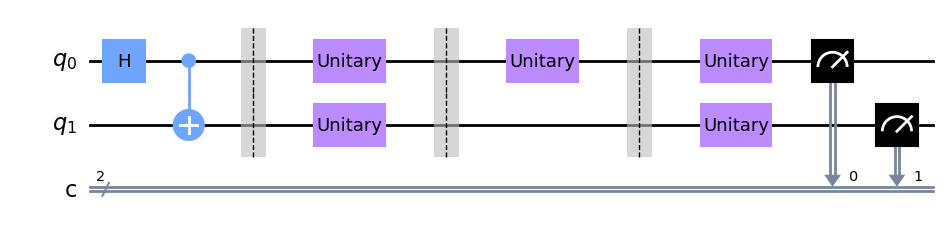

In [14]:
qubit_4circuit.measure(0,0)
qubit_4circuit.measure(1,1)

qubit_4circuit.draw(output='mpl')

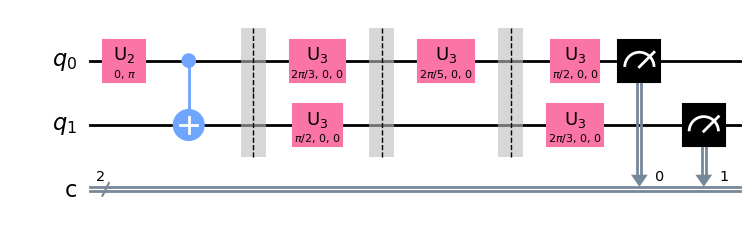

In [15]:
qubit_4circuit.decompose().draw(output='mpl')

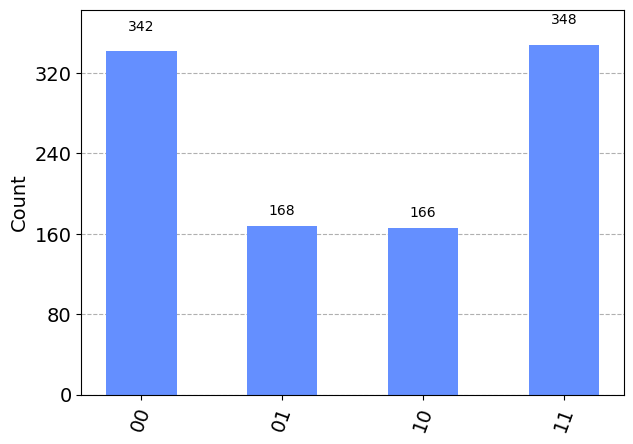

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qubit_4circuit)
resultQ= job.result()  
display(plot_histogram(job.result().get_counts()))
kk=job.result().get_counts()

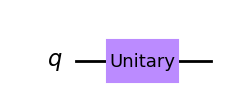

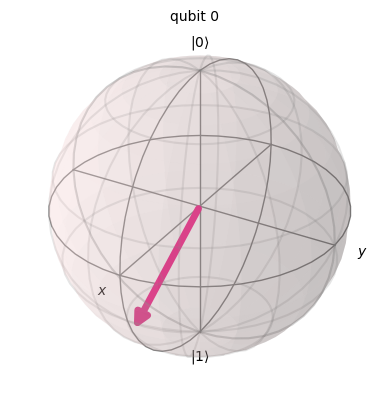

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)

# qc.append(gate1_bob, [0])
qc.append(gate1_alice, [0])
display(qc.draw(output='mpl'))

# Let's see the result
qc.save_statevector()
#qobj = assemble(qc)
state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(state)


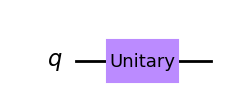

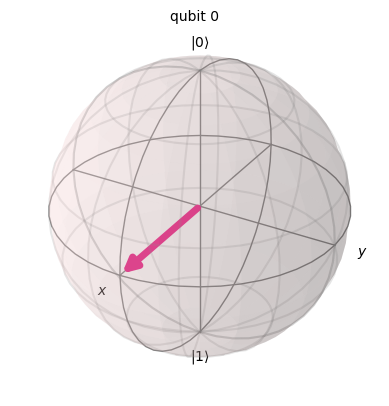

In [13]:
qc1 = QuantumCircuit(1)

qc1.append(gate1_bob, [0])
# qc1.append(gate1_alice, [0])
display(qc1.draw(output='mpl'))

# Let's see the result
qc1.save_statevector()
#qobj = assemble(qc)
state1 = sim.run(qc1).result().get_statevector()
plot_bloch_multivector(state1)


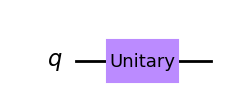

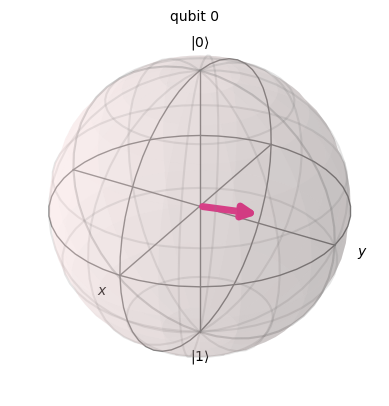

In [14]:
qc2 = QuantumCircuit(1)

qc2.append(gate2_alice_dag, [0])
# qc2.append(gate2_bob_dag, [0])
display(qc2.draw(output='mpl'))

# Let's see the result
qc2.save_statevector()
#qobj = assemble(qc)
state2 = sim.run(qc2).result().get_statevector()
plot_bloch_multivector(state2)


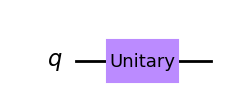

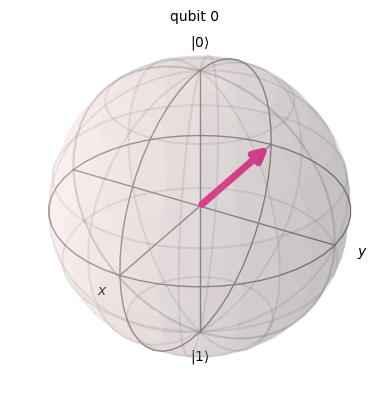

In [15]:
qc3 = QuantumCircuit(1)

# qc2.append(gate2_alice_dag, [0])
qc3.append(gate2_bob_dag, [0])
display(qc3.draw(output='mpl'))

# Let's see the result
qc3.save_statevector()
#qobj = assemble(qc)
state3 = sim.run(qc3).result().get_statevector()
plot_bloch_multivector(state3)


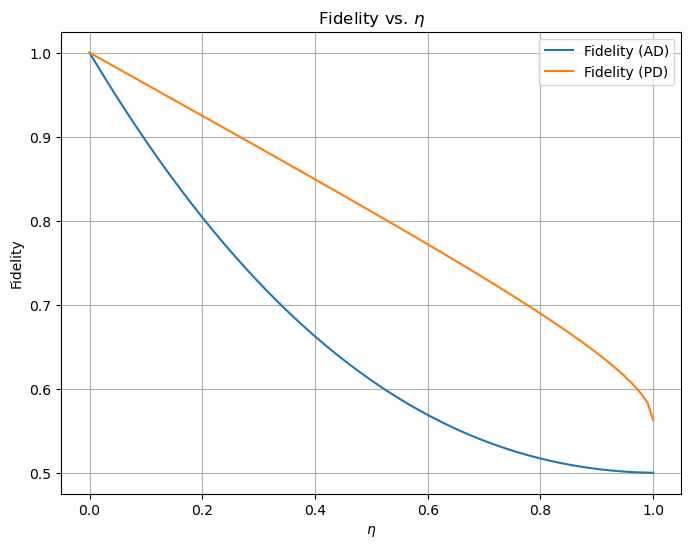

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fidelity_ad(eta):
    """
    Calculates the average force based on the given formula.

    Args:
        eta (float or numpy.ndarray): The parameter value(s) (should be between 0 and 1).

    Returns:
        float or numpy.ndarray: The average force(s).
    """
    term1 = 4 * (np.sqrt(1 - eta) + 3)
    term2 = (eta**2 - (3 * (np.sqrt(1 - eta) + 2)) * eta + 7 * np.sqrt(1 - eta) + 9)
    avg_force_ad = (1 / 16) * (term1 - eta * term2)
    return avg_force_ad

def fidelity_pd(eta):
    """
    Calculates the average force based on the given formula.

    Args:
        eta (float or numpy.ndarray): The parameter value(s) (should be between 0 and 1).

    Returns:
        float or numpy.ndarray: The average force(s).
    """
    term1 = 4 * (np.sqrt(1 - eta) + 3)
    term2 = (eta**2 - (3 * (np.sqrt(1 - eta) + 2)) * eta + 7 * np.sqrt(1 - eta) + 9)
    avg_force_pd = (1 / 16) * ((1 / 4) * term1 * (4 - eta))
    return avg_force_pd

# Generate an array of 100 evenly spaced values between 0 and 1
eta_values = np.linspace(0, 1, 100)

# Calculate the average force for each eta value
average_forces1 = fidelity_ad(eta_values)
average_forces2 = fidelity_pd(eta_values)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(eta_values, average_forces1, label="Fidelity (AD)")
plt.plot(eta_values, average_forces2, label="Fidelity (PD)")
plt.xlabel(r"$\eta$")
plt.ylabel("Fidelity")
plt.title("Fidelity vs. $\eta$")
plt.grid(True)
plt.legend()
plt.show()


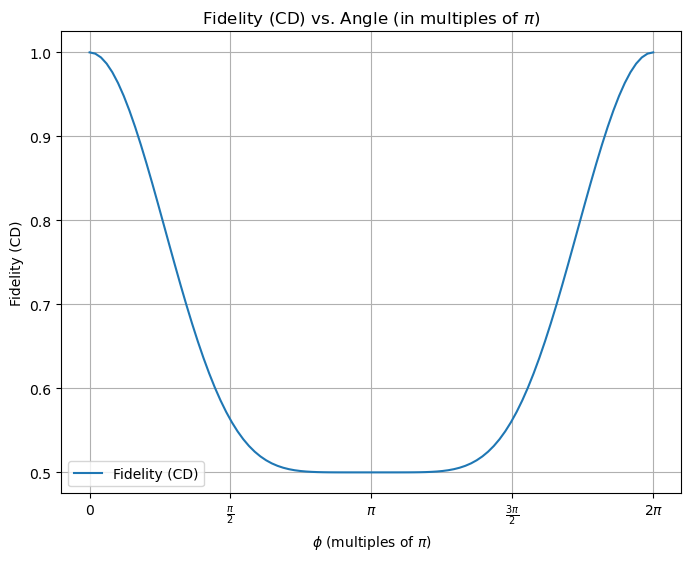

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def average_force_cd(phi):
    """
    Calculates the average force component F_{CD}^{av} based on the given formula.

    Args:
        phi (float or numpy.ndarray): The angle value(s) in radians.

    Returns:
        float or numpy.ndarray: The average force component(s).
    """
    term1 = 15 * np.cos(phi) + 6 * np.cos(2 * phi)
    term2 = np.cos(3 * phi) + 42
    avg_force_cd = (1 / 64) * (term1 + term2)
    return avg_force_cd

# Generate an array of angles (in radians) from 0 to 2*pi
phi_values = np.linspace(0, 2 * np.pi, 100)

# Calculate the average force for each angle
average_forces_cd = average_force_cd(phi_values)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(phi_values, average_forces_cd, label="Fidelity (CD)")
plt.xlabel(r"$\phi$ (multiples of $\pi$)")
plt.ylabel("Fidelity (CD)")
plt.title("Fidelity (CD) vs. Angle (in multiples of $\pi$)")
plt.grid(True)
plt.legend()

# Customize x-axis ticks and labels
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

plt.show()


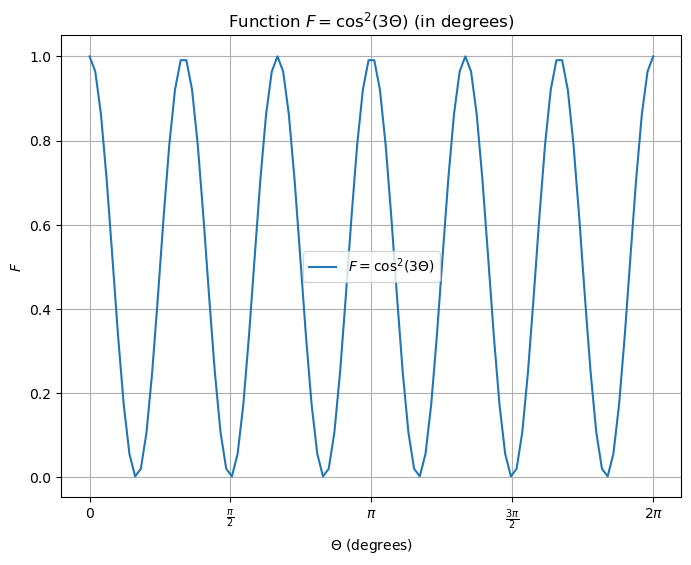

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_f_squared(theta_deg):
    """
    Calculates the value of F = cos^2(3*theta) based on the given formula.

    Args:
        theta_deg (float or numpy.ndarray): The angle value(s) in degrees.

    Returns:
        float or numpy.ndarray: The calculated value(s) of F.
    """
    # theta_rad = np.radians(theta_deg)  # Convert degrees to radians
    f_squared = np.cos(3 * theta_deg) ** 2
    return f_squared

# Generate an array of angles (in degrees) from 0 to 360
theta_deg_values = np.linspace(0, 2 * np.pi, 100)
# phi_values = np.linspace(0, 2 * np.pi, 100)

# Calculate the value of F for each angle
f_squared_values = calculate_f_squared(theta_deg_values)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(theta_deg_values, f_squared_values, label="$F = \cos^2(3\Theta)$")
plt.xlabel(r"$\Theta$ (degrees)")
plt.ylabel("$F$")
plt.title("Function $F = \cos^2(3\Theta)$ (in degrees)")
plt.grid(True)
plt.legend()
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

plt.show()



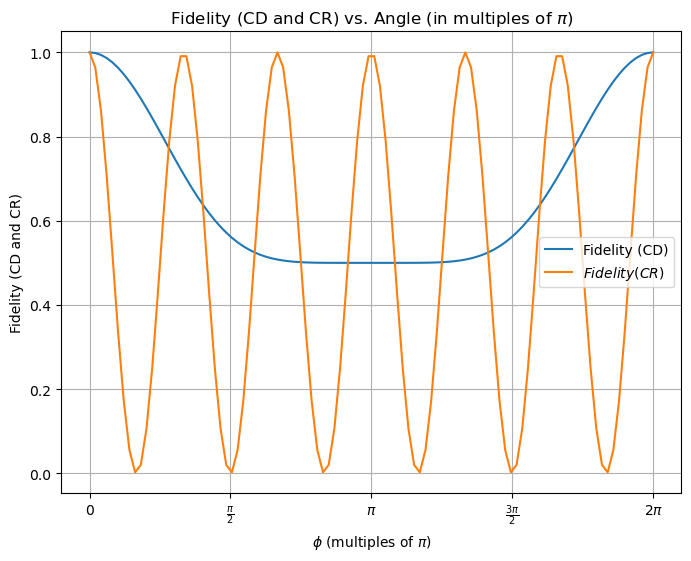

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_f_squared(theta_deg):
    """
    Calculates the value of F = cos^2(3*theta) based on the given formula.

    Args:
        theta_deg (float or numpy.ndarray): The angle value(s) in degrees.

    Returns:
        float or numpy.ndarray: The calculated value(s) of F.
    """
    # theta_rad = np.radians(theta_deg)  # Convert degrees to radians
    f_squared = np.cos(3 * theta_deg) ** 2
    return f_squared

# Generate an array of angles (in degrees) from 0 to 360
phi_values = np.linspace(0, 2 * np.pi, 100)
# phi_values = np.linspace(0, 2 * np.pi, 100)

# Calculate the value of F for each angle
f_squared_values = calculate_f_squared(phi_values)


def average_force_cd(phi):
    """
    Calculates the average force component F_{CD}^{av} based on the given formula.

    Args:
        phi (float or numpy.ndarray): The angle value(s) in radians.

    Returns:
        float or numpy.ndarray: The average force component(s).
    """
    term1 = 15 * np.cos(phi) + 6 * np.cos(2 * phi)
    term2 = np.cos(3 * phi) + 42
    avg_force_cd = (1 / 64) * (term1 + term2)
    return avg_force_cd

# Generate an array of angles (in radians) from 0 to 2*pi


# Calculate the average force for each angle
average_forces_cd = average_force_cd(phi_values)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(phi_values, average_forces_cd, label="Fidelity (CD)")
plt.plot(phi_values, f_squared_values, label="$Fidelity (CR)$")
plt.xlabel(r"$\phi$ (multiples of $\pi$)")
plt.ylabel("Fidelity (CD and CR)")
plt.title("Fidelity (CD and CR) vs. Angle (in multiples of $\pi$)")
plt.grid(True)
plt.legend()

# Customize x-axis ticks and labels
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

plt.show()



In [16]:
# Function to convert a string
# into it's equivalent Binary
def string_to_binary(st : str):
	return [bin(ord(i))[2:].zfill(8) for i in st]

# This is an optional function
# this is to show that our result is correct
def binary_to_string(bits):
	return ''.join([chr(int(i, 2)) for i in bits])

# Driver Code
st = str(input("Enter the message : "))

# Storing the result in variable b
# Currently the result is in list format
b = string_to_binary(st)
print(b)
# We are joining each element of the list
bt = list("".join(b))

# Printing the final Result
print("Converting the String into Binary : ",bt)

# This section is just to verify
# the result we got is correct

s = list(binary_to_string(b))
#print(s)
# Printing the result
print("The string created from the binary parts : ",s)



['01110111', '01100101', '01101100', '01100011', '01101111', '01101101', '01100101']
Converting the String into Binary :  ['0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1']
The string created from the binary parts :  ['w', 'e', 'l', 'c', 'o', 'm', 'e']


In [17]:
import numpy


ak=[]
for i in range(len(bt)):
    if bt[i]=='0':
        ak.append(0)
    elif bt[i]=='1':
        ak.append(1)  

print(ak)

print(len(ak))

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
56


In [18]:
# Returns XOR of 'a' and 'b'
# (both of same length)


def xor(a, b):

	# initialize result
	result = []

	# Traverse all bits, if bits are
	# same, then XOR is 0, else 1
	for i in range(1, len(b)):
		if a[i] == b[i]:
			result.append('0')
		else:
			result.append('1')

	return ''.join(result)


# Performs Modulo-2 division
def mod2div(dividend, divisor):

	# Number of bits to be XORed at a time.
	pick = len(divisor)

	# Slicing the dividend to appropriate
	# length for particular step
	tmp = dividend[0: pick]

	while pick < len(dividend):

		if tmp[0] == '1':

			# replace the dividend by the result
			# of XOR and pull 1 bit down
			tmp = xor(divisor, tmp) + dividend[pick]

		else: # If leftmost bit is '0'
			# If the leftmost bit of the dividend (or the
			# part used in each step) is 0, the step cannot
			# use the regular divisor; we need to use an
			# all-0s divisor.
			tmp = xor('0'*pick, tmp) + dividend[pick]

		# increment pick to move further
		pick += 1

	# For the last n bits, we have to carry it out
	# normally as increased value of pick will cause
	# Index Out of Bounds.
	if tmp[0] == '1':
		tmp = xor(divisor, tmp)
	else:
		tmp = xor('0'*pick, tmp)

	checkword = tmp
	return checkword

# Function used at the sender side to encode
# data by appending remainder of modular division
# at the end of data.


def encodeData(data, key):

	l_key = len(key)

	# Appends n-1 zeroes at end of data
	appended_data = data + '0'*(l_key-1)
	remainder = mod2div(appended_data, key)

	# Append remainder in the original data
	codeword = data + remainder
	return remainder


# Driver code
data ="".join([str(x) for x in ak])
key = "1000011"
Measured_d=list(encodeData(data, key))
print("The FCS generated is :")
print(Measured_d)



The FCS generated is :
['1', '0', '1', '0', '0', '0']


In [19]:
def divbide ():
    cc=[]
    kc=[]
    fd=[]
    sd=[]
    dc=[]
    flagss=[0,1,1,1,1,1,1,0]
    ipAdsender=[1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1]
    ipAdreceiver=[1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0]
    flagse=[0,1,1,1,1,1,1,0]
    
    CRCvalue = []
    for j in range(len(Measured_d)):
        if Measured_d[j]=='0':
            CRCvalue.append(0)
        elif Measured_d[j]=='1':
            CRCvalue.append(1)
        
    #print(CRCvalue)
    
    
    
    
    
    if (len(ak)/16)==0:
        for i in range(len(ak)//16):
            if i==0:
                for j in ak[i:16]:
                    cc.append(j)
            if i==1:
                for k in ak[i*16:32]:
                    kc.append(k)
            if i==2:
                for h in ak[i*16:48]:
                    dc.append(h)
            if i==3:
                for g in ak[i*16:48]:
                    sd.append(g)
            if i==4:
                for f in ak[i*16:64]:
                    fd.append(f)
        
                
    if (len(ak)/16)!=0:
        for i in range((len(ak)//16)+2):
            h=i*16
            if i==0:
                for j in ak[i:h+16]:
                    cc.append(j)
            if i==1:
                for k in ak[h:h+16]:
                    kc.append(k)
            if i==2:
                for h in ak[h:h+16]:
                    dc.append(h)
            if i==3:
                for g in ak[h:h+16]:
                    sd.append(g)
            if i==4:
                for f in ak[h:h+16]:
                    fd.append(f)
        
        
    
    return flagss,ipAdsender,ipAdreceiver,cc,kc,dc,sd,fd,CRCvalue,flagse

print(divbide ())

div_ided1= divbide()
# Remove empty lists from the vinay list



div_ided = [x for x in div_ided1 if x and len(x) > 0]

print(div_ided)

for l in range(len(div_ided)):
    print(div_ided[:][l])
    
    
    
print(range((len(ak)//16)+2))

new1=[]
for i in range(len(div_ided)):
    new1.append(len(div_ided[i]))
    
    
print(new1)

([0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1], [], [1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0])
[[0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0]]
[0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 1]
[1,

In [20]:
import random
bk = [random.randint(0, 1) for i in range(len(ak))]
print(bk)

print(len(bk))

[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
56


In [21]:
#new1=[1,1,1,1,0,1,2,4,6,0]
new=[]
for i in range(len(new1)):
    if new1[i]==0:
        pass
    if new1[i]!=0:
        new.append(new1[i])
        
print(new)

[8, 16, 16, 16, 16, 16, 8, 6, 8]


In [22]:
import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer,Aer,assemble

# import basic plot tools
from qiskit.tools.visualization import circuit_drawer, plot_histogram

 
def build_circuitMSG(num):
   

    
    
    circuit=QuantumCircuit(new[num],new[num])


    for i in range(new[num]):
        if div_ided[num][i]==1 and bk[i]==0:
            circuit.initialize([0,1],i)
        elif div_ided[num][i]==0 and bk[i]==0:
            circuit.initialize([1,0],i)
        elif div_ided[num][i]==0 and bk[i]==1:
            circuit.initialize([1/np.sqrt(2),1/np.sqrt(2)],i)
        elif div_ided[num][i]==1 and bk[i]==1:
            circuit.initialize([1/np.sqrt(2),-1/np.sqrt(2)],i)

    circuit.barrier()

    for i in range(new[num]):
        if bk[i]==1:
            circuit.h(i)
            circuit.measure(i, i)
            circuit.draw(output='mpl')
        else:
            circuit.measure(i,i)
            circuit.draw(output='mpl')

    display(circuit.draw(output='mpl'))

            
    aer_sim = Aer.get_backend('aer_simulator')
    job = aer_sim.run(circuit)
    resultQ= job.result()  
    display(plot_histogram(job.result().get_counts()))
    kk=job.result().get_counts()

    dictionary=dict(kk)
    resultsQ=dictionary.keys()
    final_flash=list(resultsQ)
    

    return final_flash[:][0]
    

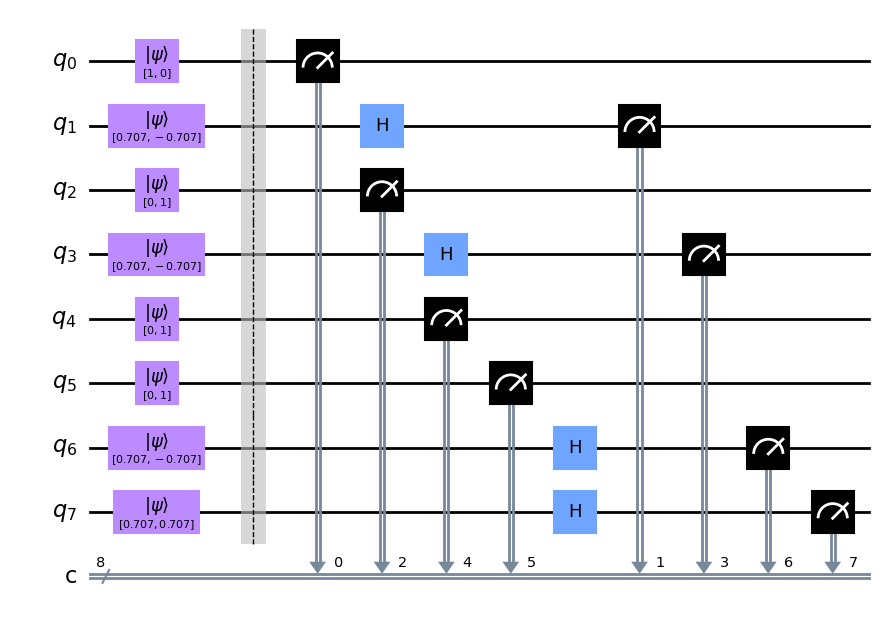

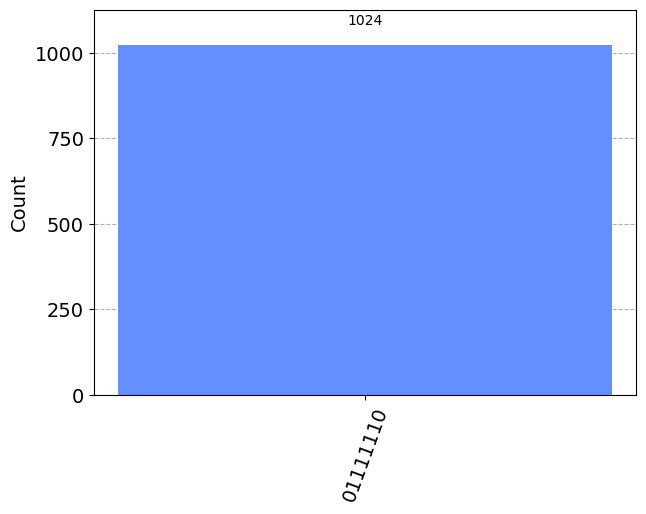

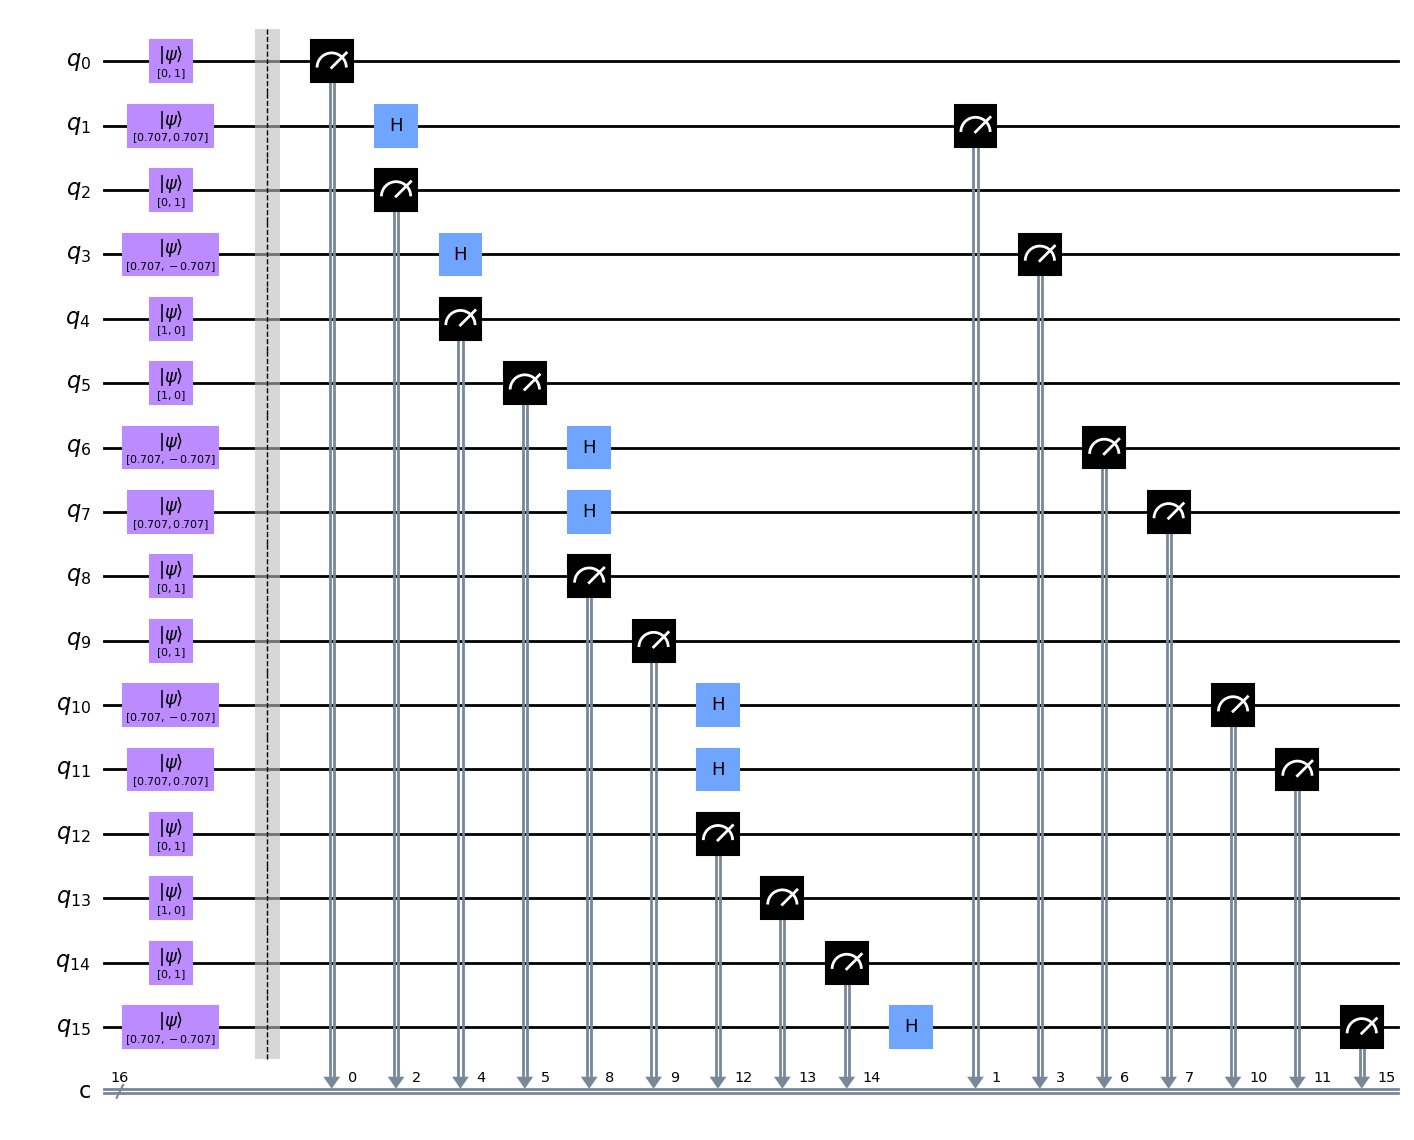

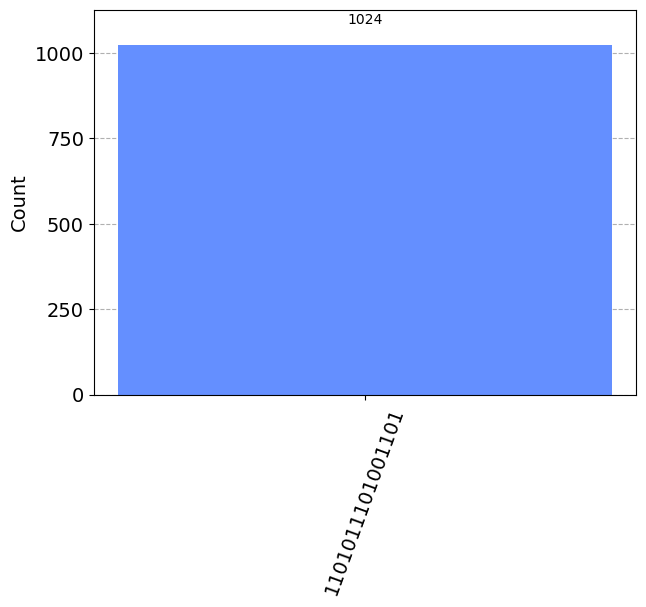

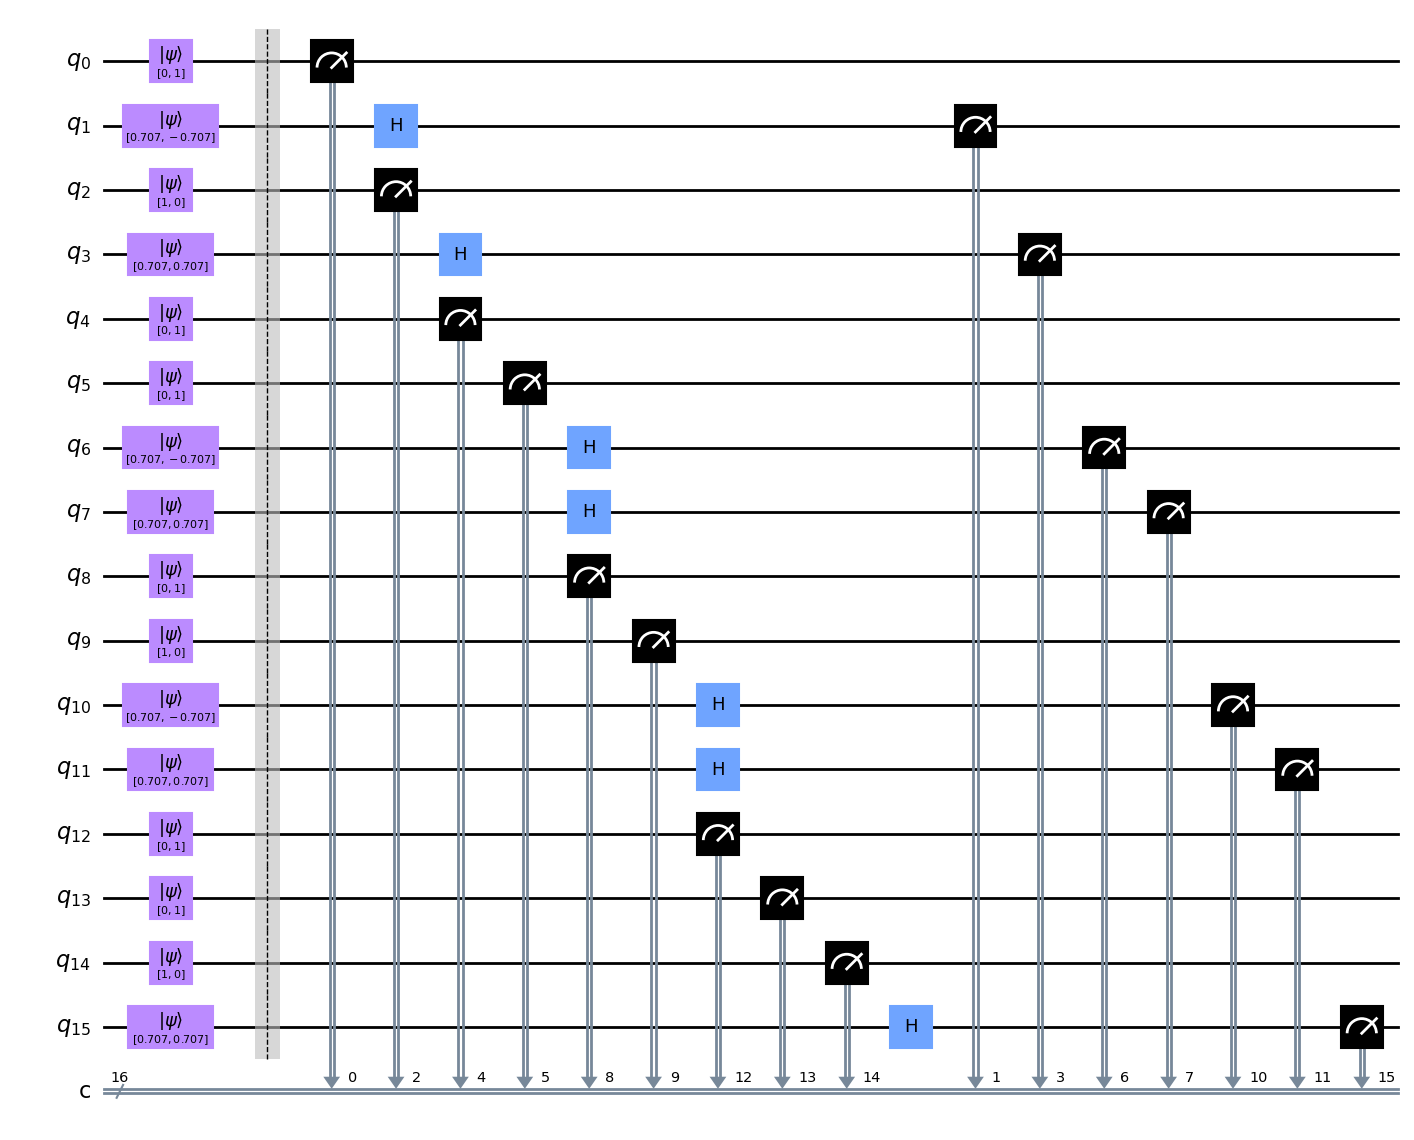

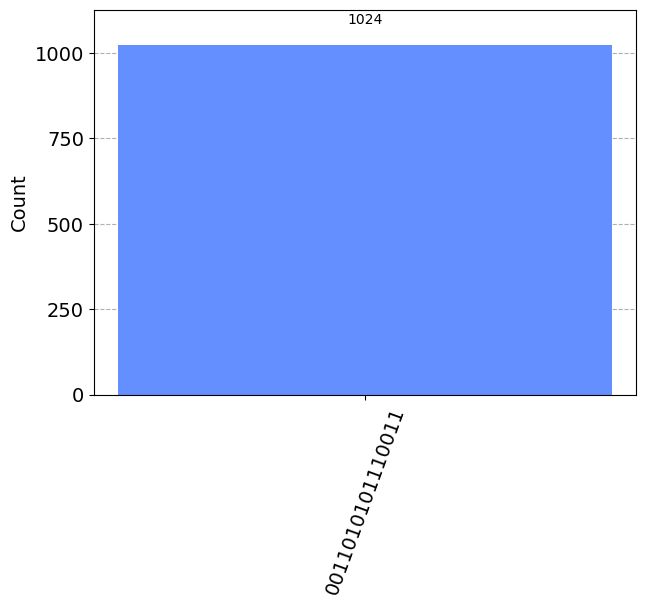

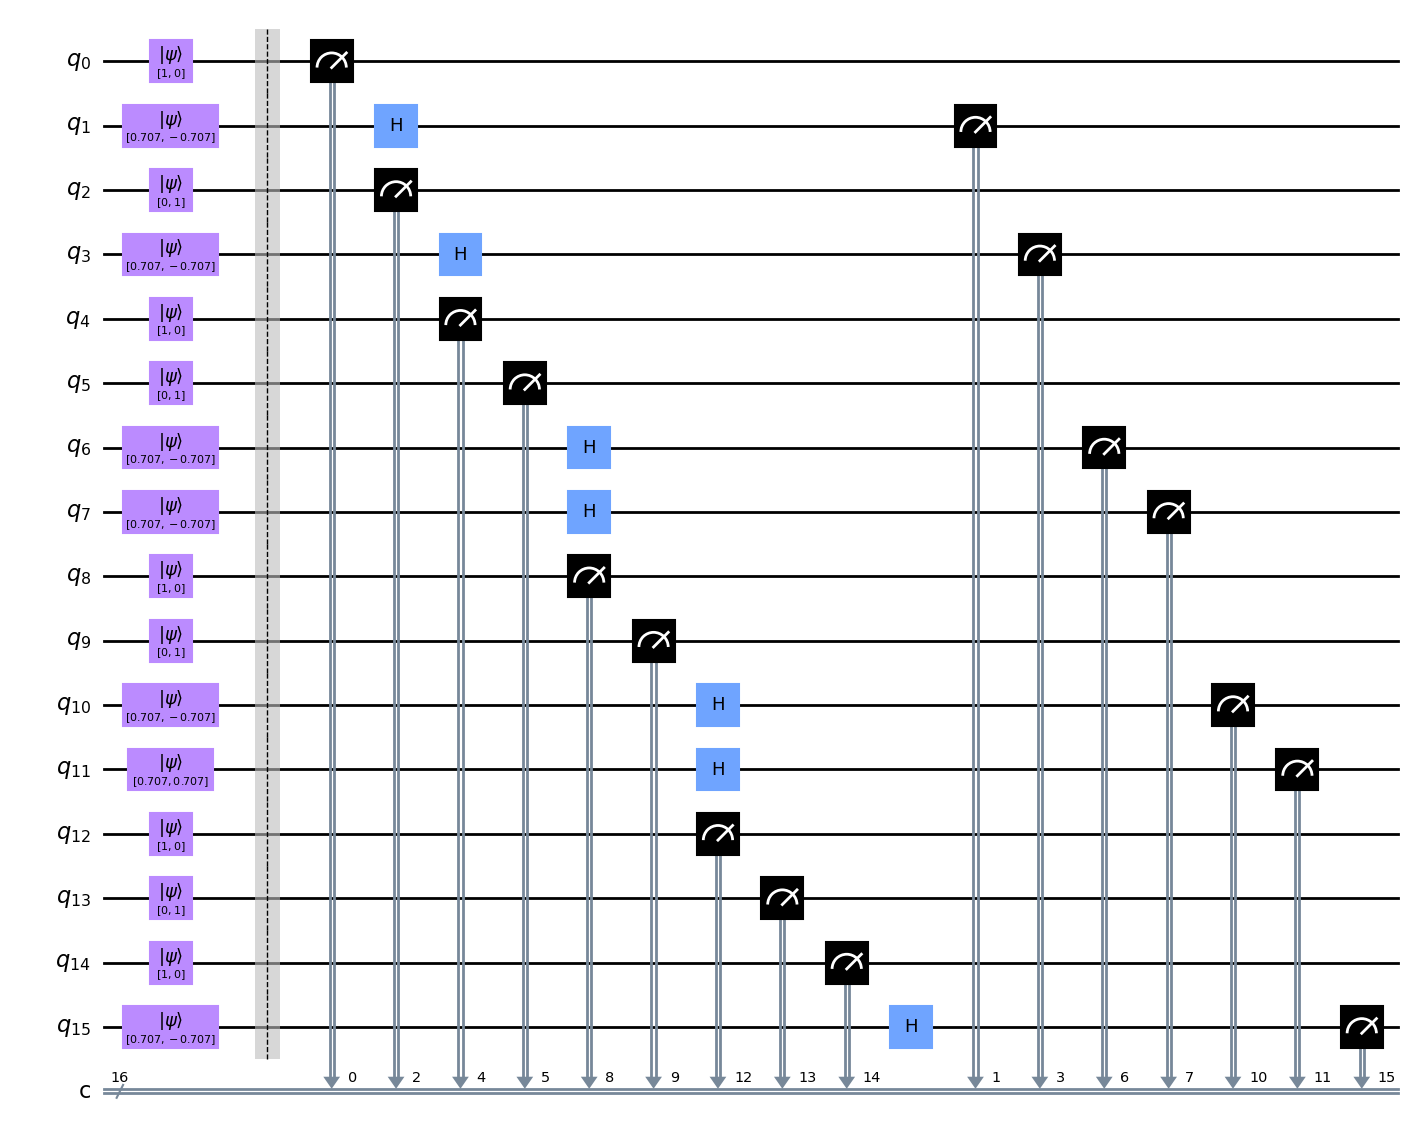

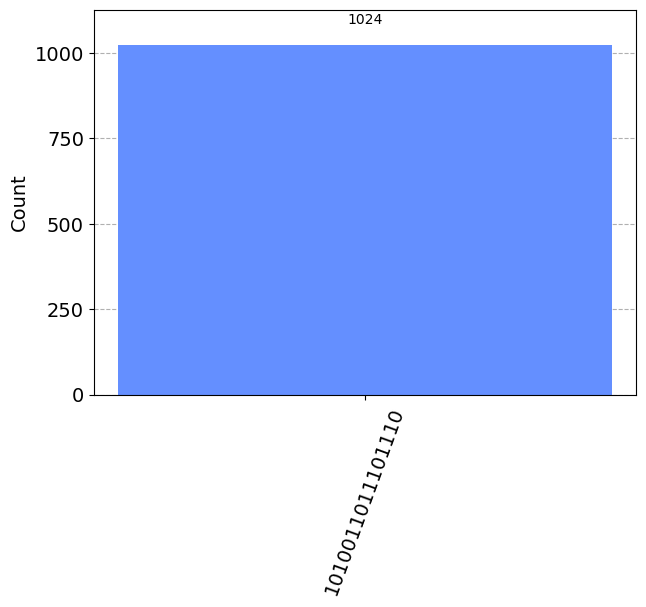

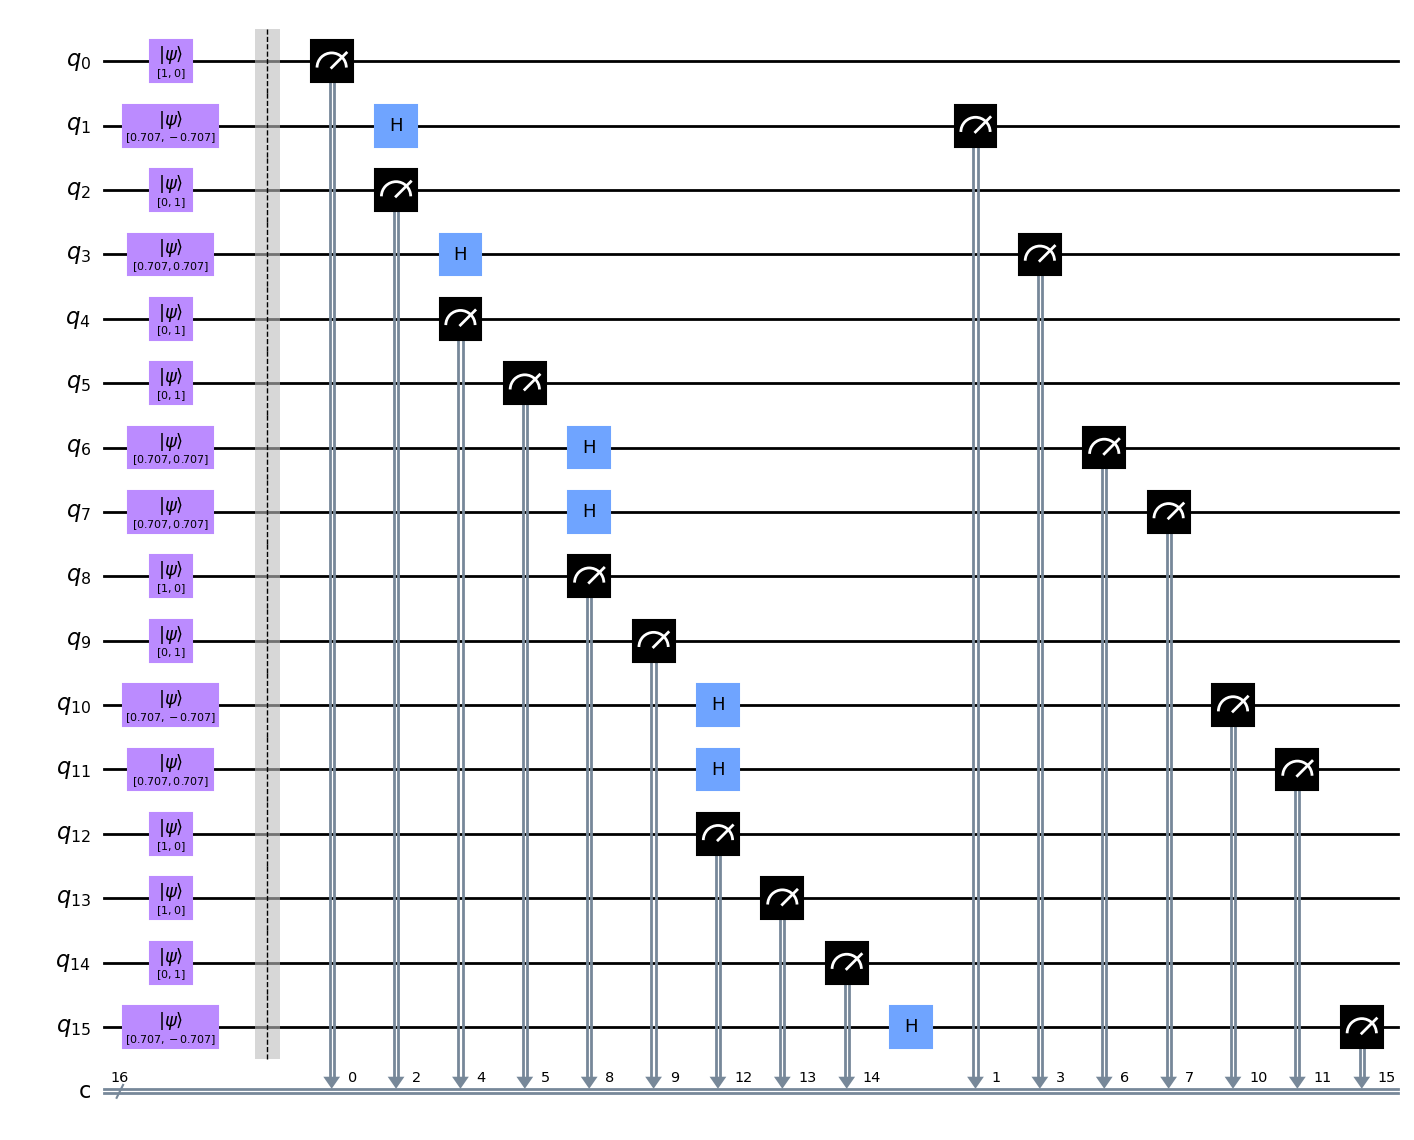

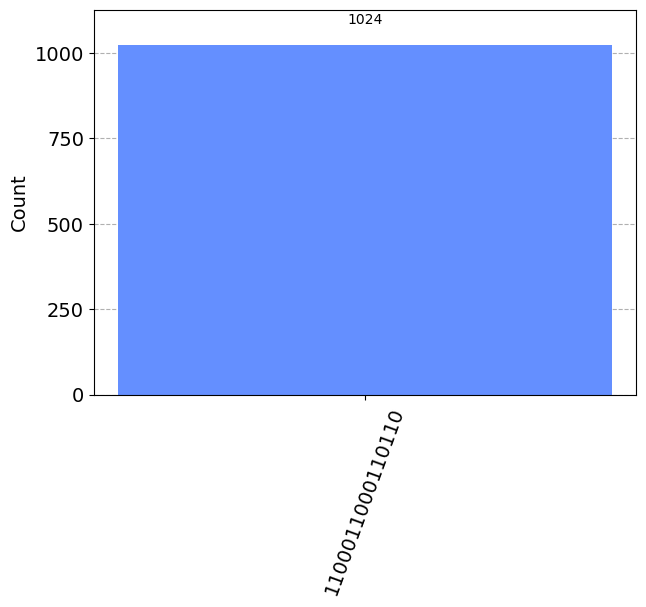

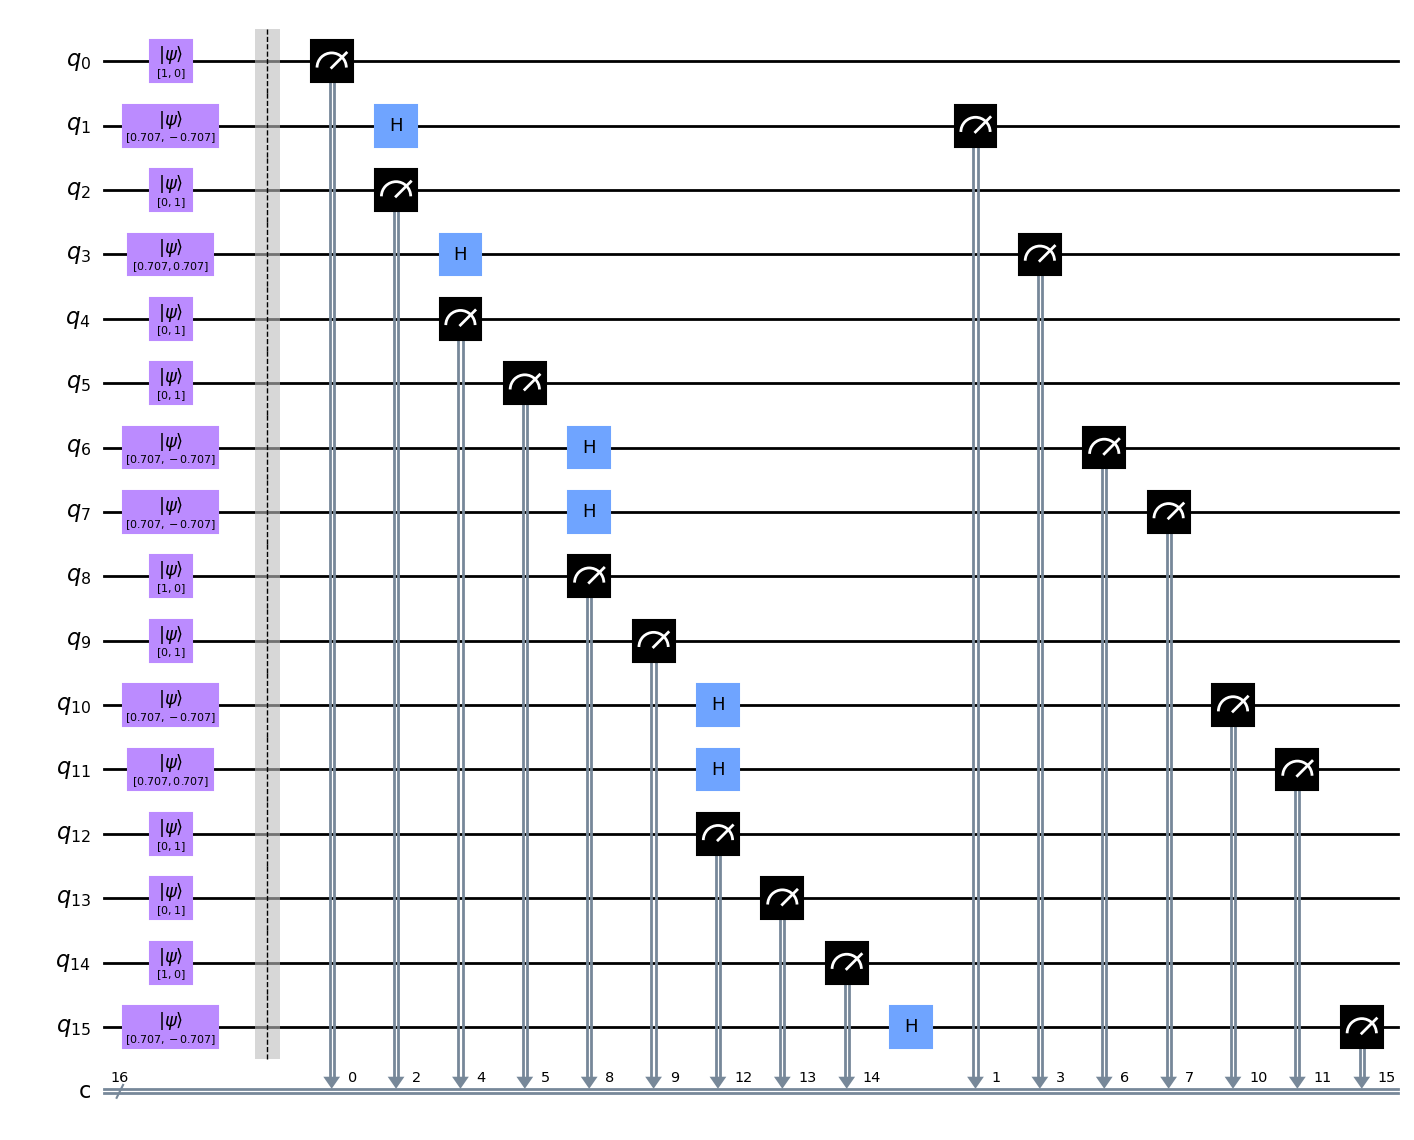

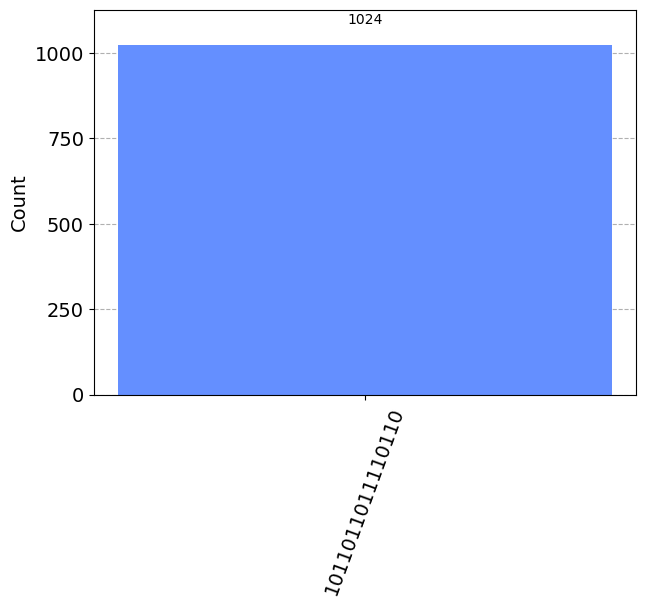

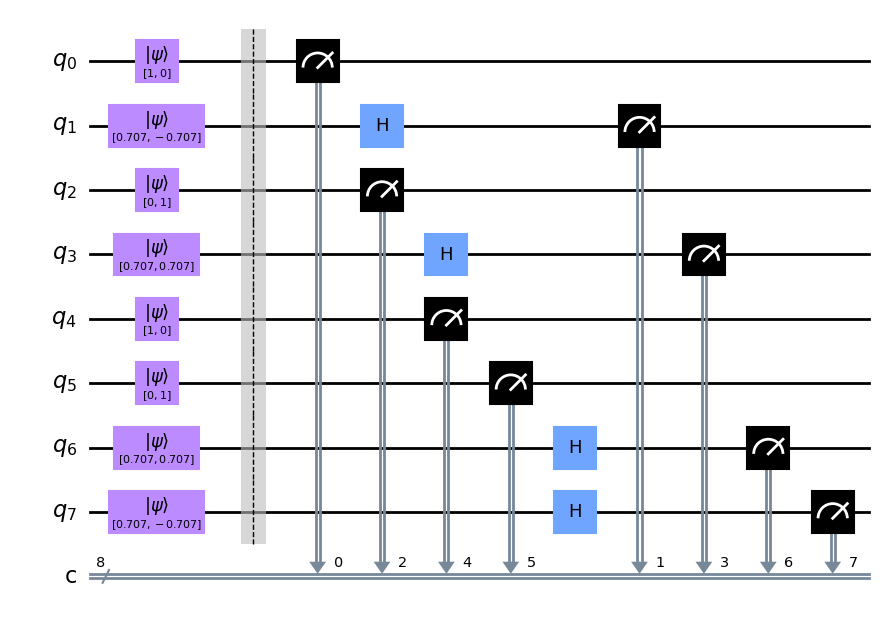

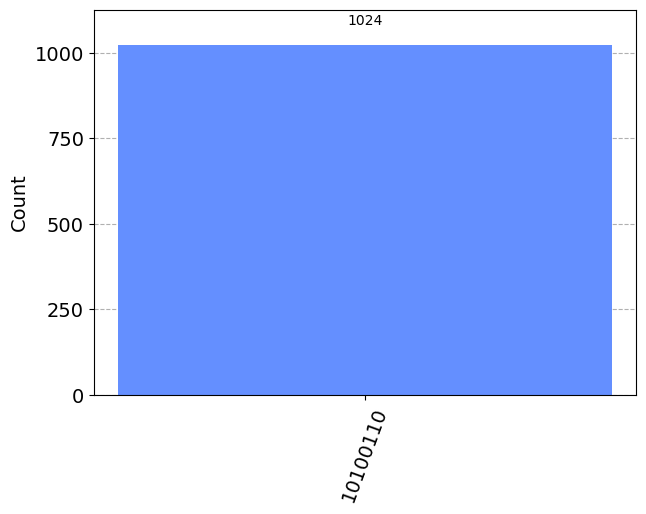

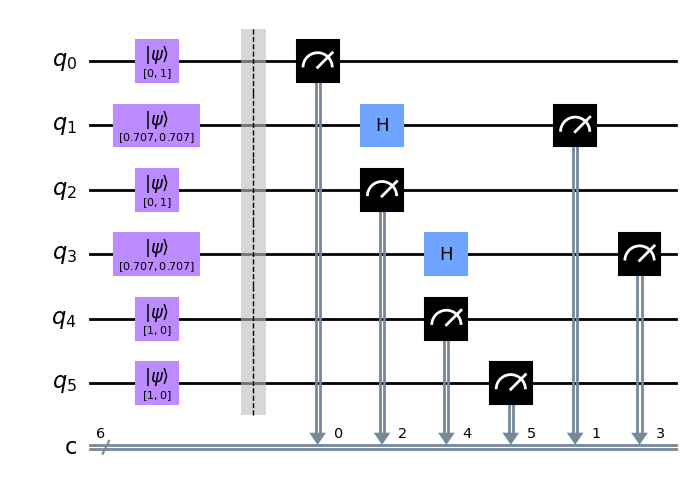

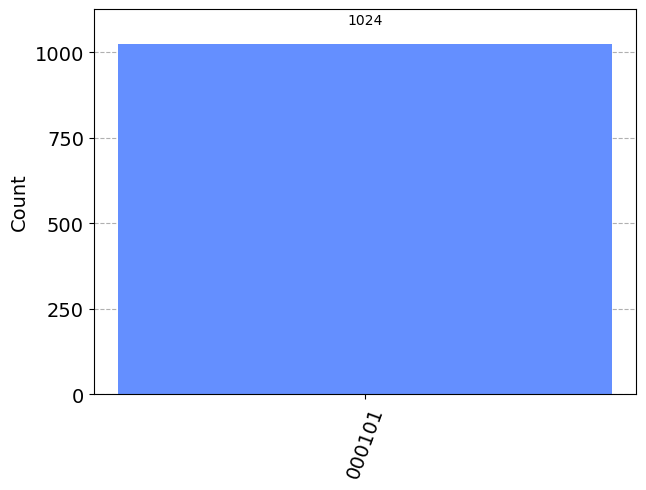

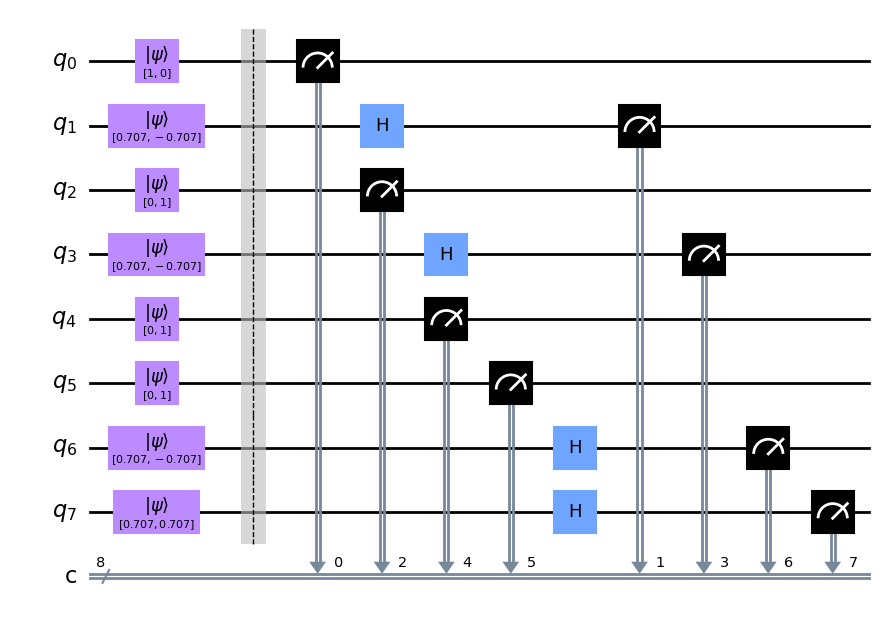

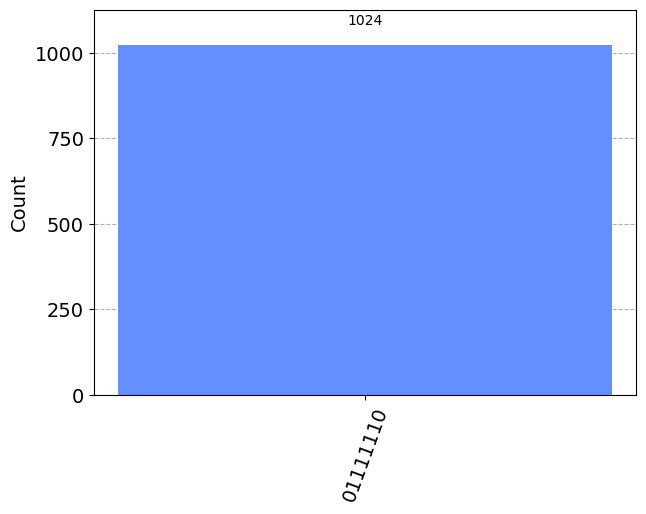

['01111110', '1101011101001101', '0011010101110011', '1010011011101110', '1100011000110110', '1011011011110110', '10100110', '000101', '01111110']


In [23]:
final=[]


for fm in range(len(new)):
    final.append(build_circuitMSG(fm))





       





print(final)

#print(final_flash)

In [24]:
import numpy
Measured_data1 = []

if ((len(bk)%16)==0):
    for i in range (len(final)):
        if (str(final[i])=='01111110') & (len(final[i])==8):
                    pass
        elif (str(final[i])=='1101011101001101') & (len(final[i])==16):
                    pass   
        elif (str(final[i])=='0011010101110011') & (len(final[i])==16):
                    pass      
        elif len(final[i])==6:
            crcChecker=[]
            for j in range(len(final[i])):
                CE=list(str(final[i]))
                if CE[j]=='0':
                    crcChecker.append(0)
                elif CE[j]=='1':
                    crcChecker.append(1)
                    
        else:       
            qq = list(final[i])
            Measured_data = []
            for j in range(len(qq)):
                if qq[j]=='0':
                    Measured_data.append(0)
                elif qq[j]=='1':
                    Measured_data.append(1)  


            Measured_data =Measured_data[::-1]
            Measured_data1 = Measured_data1 + Measured_data
            
elif((len(bk)%16)!=0):
    for i in range (len(final)):
        if (str(final[i]) == '01111110') & (len(final[i])==8):
                    pass
        elif (str(final[i])=='1101011101001101') & (len(final[i])==16):
                    pass   
        elif (str(final[i])=='0011010101110011') & (len(final[i])==16):
                    pass   
        elif len(final[i])==6:
            crcChecker=[]
            for j in range(len(final[i])):
                CE=list(str(final[i]))
                if CE[j]=='0':
                    crcChecker.append(0)
                elif CE[j]=='1':
                    crcChecker.append(1)  
        else:       
            qq = list(final[i])
            
            Measured_data = []
            for j in range(len(qq)):
                if qq[j]=='0':
                    Measured_data.append(0)
                elif qq[j]=='1':
                    Measured_data.append(1)  


            Measured_data =Measured_data[::-1]
            Measured_data1 = Measured_data1 + Measured_data 

                    
        
        




print(Measured_data1)
print(len(Measured_data1))
print(crcChecker)

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
56
[0, 0, 0, 1, 0, 1]


In [25]:
#print(list(Measured_data1))
lkj=list(Measured_data1)
kl=list(crcChecker[::-1])

fgh=lkj.extend(kl)

print(fgh)

print(lkj)

None
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]


In [26]:
#crcMeasured_data1=datacheck.append(list(str(final[8])))

datacheck ="".join([str(x) for x in lkj])
key = "1000011"
Measured_CRC=list(encodeData(datacheck, key))
print("reminder after division with the data is :")
print(Measured_CRC)




reminder after division with the data is :
['0', '0', '0', '0', '0', '0']


In [27]:

l = []
for i in range(len(Measured_data1) // 8):
    h = i * 8
    k = Measured_data1[h:h+8]
    l.append(k)

# Join the sub-lists without commas
#print(l)
receiver_message = [''.join(map(str, sub_list)) for sub_list in l]

print(receiver_message)


vinay=Measured_data1[:]

#kale="".join([str(x) for x in vinay])
#print(kale)

received_message = binary_to_string(receiver_message)

# Printing the result
print("message received from the sender is : ",received_message)

['01110111', '01100101', '01101100', '01100011', '01101111', '01101101', '01100101']
message received from the sender is :  welcome


In [28]:
received_message = binary_to_string(receiver_message)

# Printing the result
print("message received from the sender is : ",received_message)

message received from the sender is :  welcome
